## 1. Import thư viện

In [7]:
# Cài đặt thư viện cần thiết
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## 2. Đọc dữ liệu

Hệ thống Giám sát Yếu tố Nguy cơ Hành vi (BRFSS - Behavioral Risk Factor Surveillance System) là một cuộc khảo sát qua điện thoại liên quan đến sức khỏe được Trung tâm Kiểm soát và Phòng ngừa Dịch bệnh Hoa Kỳ (CDC) thu thập hàng năm. Mỗi năm, cuộc khảo sát này thu thập phản hồi từ hơn 400.000 người Mỹ về các hành vi nguy cơ liên quan đến sức khỏe, các tình trạng bệnh mãn tính, và việc sử dụng các dịch vụ phòng ngừa. Cuộc khảo sát đã được thực hiện đều đặn hàng năm kể từ năm 1984.

Trong dự án này, một tệp CSV của bộ dữ liệu BRFSS từ năm 2015 (có sẵn trên Kaggle) đã được sử dụng. Bộ dữ liệu gốc này bao gồm phản hồi từ 441.455 cá nhân và có tổng cộng 330 đặc trưng. Những đặc trưng này bao gồm các câu hỏi được hỏi trực tiếp người tham gia, hoặc là các biến số được tính toán dựa trên câu trả lời cá nhân của họ.

diabetes_binary_5050split_health_indicators_BRFSS2015.csv là một bộ dữ liệu đã được làm sạch, bao gồm 70.692 phản hồi khảo sát từ BRFSS2015 của CDC. Bộ dữ liệu này có tỷ lệ phân chia 50-50 giữa người không mắc tiểu đường và người mắc tiền tiểu đường hoặc tiểu đường.

Biến mục tiêu Diabetes_binary có 2 lớp:

- 0 đại diện cho không mắc tiểu đường

- 1 đại diện cho tiền tiểu đường hoặc tiểu đường

Bộ dữ liệu này bao gồm 21 biến đặc trưng (feature variables) và đã được cân bằng (balanced dataset).

In [8]:
#Đọc dữ liệu từ file CSV
df = pd.read_csv(r'data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head(10) # đọc 10 mẫu dữ liệu đầu tiên

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [3]:
# Đọc thông tin dữ liệu
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Giải nghĩa các trường dữ liệu: 

- `Diabetes_binary`: Bệnh nhân có mắc tiểu đường hay không (0: Không, 1: Có – bao gồm tiền tiểu đường hoặc tiểu đường).

- `HighBP`: Bệnh nhân từng được bác sĩ, y tá hoặc chuyên gia y tế thông báo là bị cao huyết áp (0: Không, 1: Có).

- `HighChol`: Bệnh nhân từng được bác sĩ, y tá hoặc chuyên gia y tế thông báo là bị cholesterol cao? (0: Không, 1: Có).

- `CholCheck`: Đã kiểm tra cholesterol trong vòng 5 năm qua (0: Không, 1: Có).

- `BMI`: Chỉ số khối cơ thể (Body Mass Index/ Công thức tính chỉ số BMI - BMI = Cân nặng/(Chiều cao^2)).

- `Smoker`: Bệnh nhân đã từng hút ít nhất 100 điếu thuốc trong đời chưa? (Lưu ý: 5 gói = 100 điếu thuốc) (0: Không, 1: Có).

- `Stroke`: Bệnh nhân đã từng bị đột quỵ chưa? (0: Không, 1: Có).

- `HeartDiseaseorAttack`: Từng được thông báo mắc bệnh tim mạch vành (CHD) hoặc nhồi máu cơ tim (MI) (0: Không, 1: Có).

- `PhysActivity`: Trong 30 ngày qua, Bệnh nhân có hoạt động thể chất hoặc tập thể dục nào ngoài công việc hàng ngày không? (0: Không, 1: Có).

- `Fruits`: Tiêu thụ trái cây 1 lần trở lên mỗi ngày (0: Không, 1: Có).

- `Veggies`: Tiêu thụ rau củ 1 lần trở lên mỗi ngày (0: Không, 1: Có).

- `HvyAlcoholConsump`: Người uống rượu nặng (nam uống >14 ly/tuần, nữ >7 ly/tuần) (0: Không, 1: Có).

- `AnyHealthcare`: Bệnh nhân có bất kỳ hình thức bảo hiểm y tế nào không (bao gồm bảo hiểm cá nhân, HMO, Medicare, hoặc Indian Health Service)? (0: Không, 1: Có).

- `NoDocbcCost`: Trong 12 tháng qua, có lúc nào Bệnh nhân cần gặp bác sĩ nhưng không thể vì chi phí? (0: Không, 1: Có).

- `GenHlth`: Đánh giá chung về tình trạng sức khỏe của Bệnh nhân (1: Rất tốt ~ 5: Rất kém).

- `MentHlth`: Trong 30 ngày qua, Bệnh nhân cảm thấy tâm lý không ổn định (căng thẳng, trầm cảm, v.v.) trong bao nhiêu ngày? (0 ~ 30 ngày).

- `PhysHlth`: Trong 30 ngày qua, sức khỏe thể chất không tốt (ốm, chấn thương) trong bao nhiêu ngày? (0 ~ 30 ngày).

- `DiffWalk`: Bệnh nhân có gặp khó khăn nghiêm trọng khi đi bộ hoặc leo cầu thang không? (0: Không, 1: Có).

- `Sex`: Giới tính của người tham gia khảo sát (0: Nữ, 1: Nam).

- `Age`: Nhóm tuổi chia thành 14 mức (1 ~ 14). 1 tương ứng 18-24 tuổi, 14 tương ứng 80 (mỗi 5 tuổi là 1 mức)

- `Education`: Trình độ học vấn cao nhất Bệnh nhân đã hoàn thành (1 ~ 6).

- `Income`: Tổng thu nhập hộ gia đình hàng năm (1 ~ 8) (nếu người trả lời từ chối, mã là "Refused"). (1 <= $10000, 5 <= $35000, 8 >= 75000)

In [4]:
# Kiểm tra dữ liệu khuyết thiếu

df.isnull().sum()



Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## 3. Phân tích dữ liệu

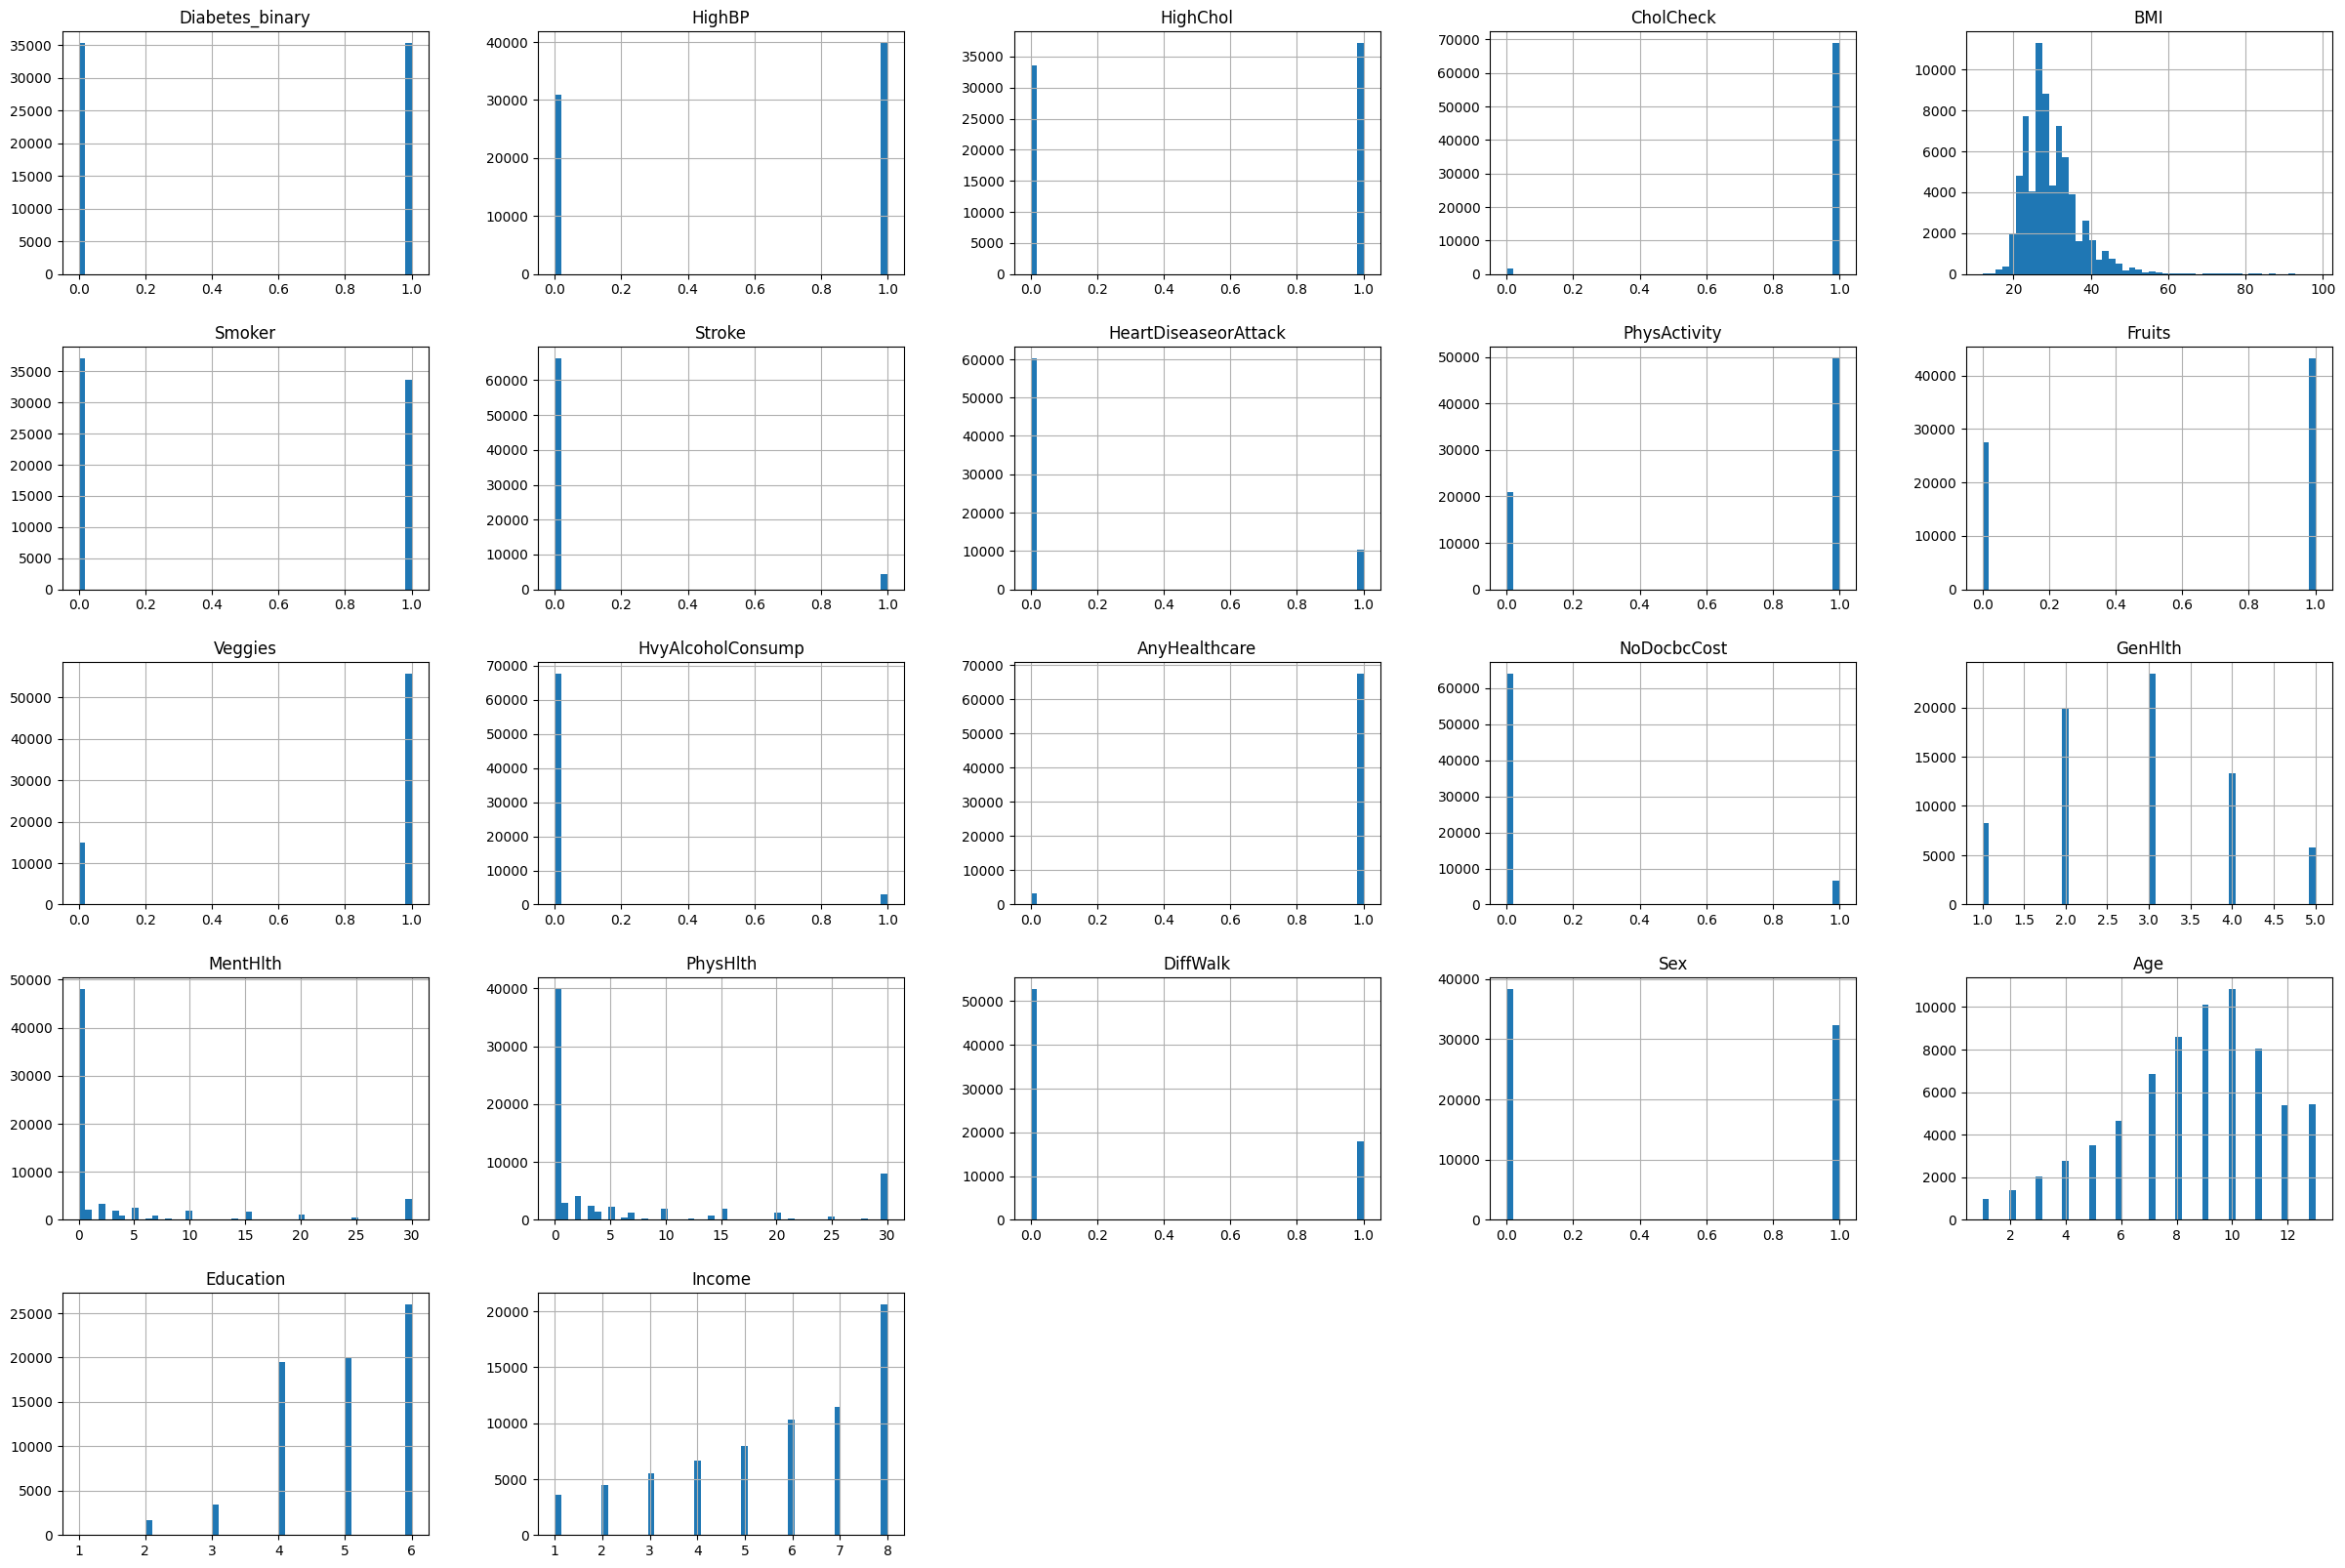

In [5]:
# Sụ phân bố các trường thông tin
df.hist( bins=50, figsize=(30, 20))
plt.show()

`Nhận xét`: Qua quan sát phân bố các biến trong tập dữ liệu, ta thấy rằng:
- Tỉ lệ bệnh nhân mắc tiểu đường và không mắc tiểu đường trong tập dữ liệu đạt trạng thái cân bằng (Diabetes_binary)
- Dữ liệu tập chung chủ yếu nhóm người cao tuổi
- Tình trạng sức khỏe (genHlth) của tập người khảo sát đạt mức trung bình
- Nhóm người tham gia khảo sát có học vấn cao (education trên mức 4) và thu nhập cao ( income trên mức 5)

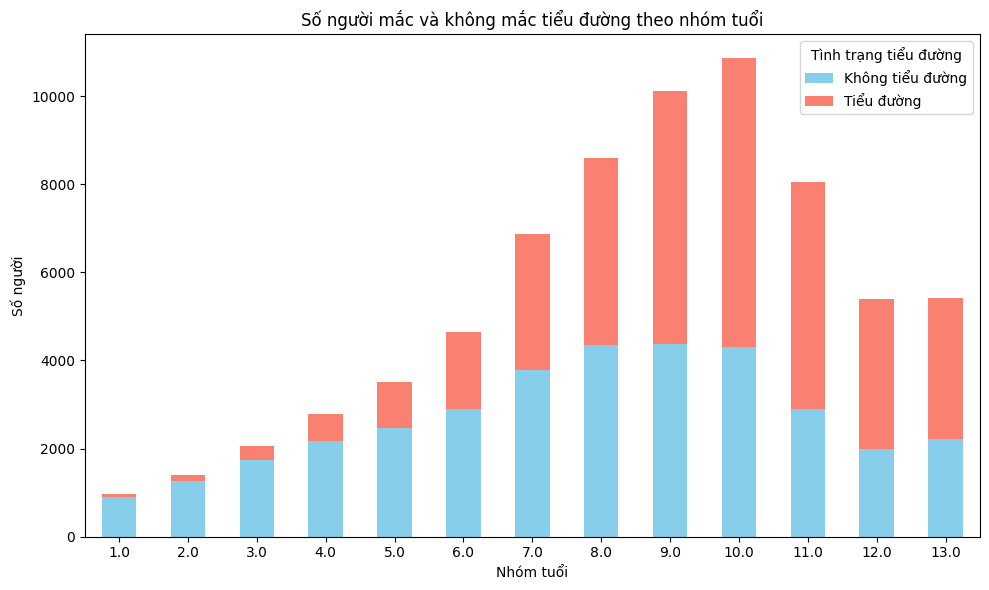

In [8]:
# phân bố nhóm độ tuổi mắc bệnh tiểu đường
# df_diabetes = df[df['Diabetes_binary'] == 1] # lọc ra các bệnh nhân mắc bệnh tiểu đường
# Nhóm theo Age và Diabetes_binary
grouped = df.groupby(['Age', 'Diabetes_binary']).size().unstack(fill_value=0)

# Đổi tên cột cho dễ hiểu (0: Không tiểu đường, 1: Tiểu đường)
grouped.columns = ['Không tiểu đường', 'Tiểu đường']

# Vẽ biểu đồ cột chồng
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title("Số người mắc và không mắc tiểu đường theo nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số người")
plt.xticks(rotation=0)
plt.legend(title="Tình trạng tiểu đường")
plt.tight_layout()
plt.show()

`Nhận xét`: Qua quan sát dữ liệu ta thấy, nhóm có nguy cơ mắc bệnh tiểu đường cao nhất là nhóm người cao tuổi, nhóm 7 -> 12 tức độ tuổi từ 50 tuổi trở lên, là các nhóm mà trong đó số người mắc tiểu đường chiếm khoảng hơn 1 nửa số người cùng nhóm được khảo sát

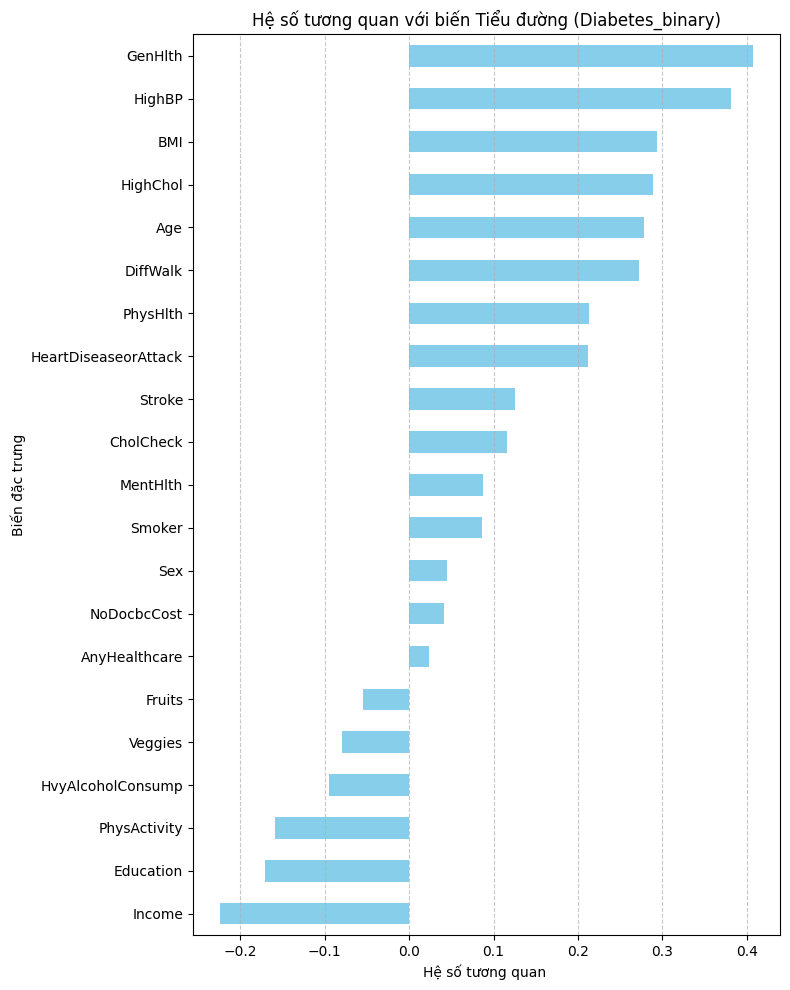

In [9]:
# Tính hệ số tương quan Pearson
correlation = df.corr(numeric_only=True)

# Lấy tương quan của tất cả biến với biến Diabetes_binary
cor_target = correlation["Diabetes_binary"].drop("Diabetes_binary").sort_values()

# Vẽ biểu đồ thanh ngang
plt.figure(figsize=(8, 10))
cor_target.plot(kind='barh', color='skyblue')

plt.title("Hệ số tương quan với biến Tiểu đường (Diabetes_binary)")
plt.xlabel("Hệ số tương quan ")
plt.ylabel("Biến đặc trưng")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

`Nhận xét`: Qua biểu đồ trên, ta thấy được các yếu tố ảnh hưởng lớn đến nguy cơ bệnh nhân mắc bệnh tiểu đường như GenHlth (tình trạng sức khỏe), HighBP(KHả năng cao huyết áp), BMI(chỉ số cơ thể), HighChol (cholesteron trong máu), Age (độ tuổi)

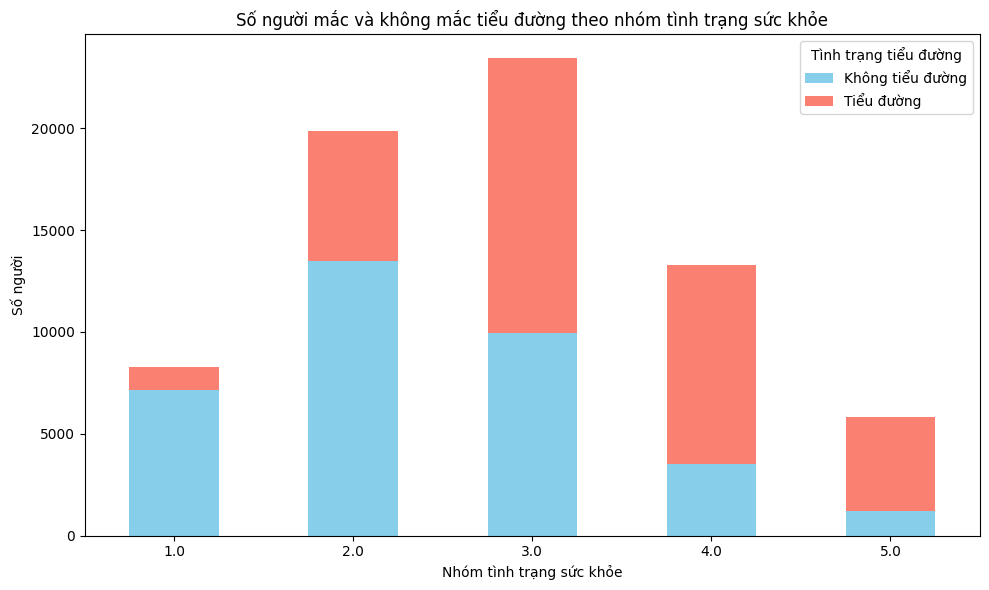

In [10]:
# phân bố tình trạng sức khỏe và bệnh tiểu đường
grouped = df.groupby(['GenHlth', 'Diabetes_binary']).size().unstack(fill_value=0)

# Đổi tên cột cho dễ hiểu (0: Không tiểu đường, 1: Tiểu đường)
grouped.columns = ['Không tiểu đường', 'Tiểu đường']

# Vẽ biểu đồ cột chồng
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title("Số người mắc và không mắc tiểu đường theo nhóm tình trạng sức khỏe")
plt.xlabel("Nhóm tình trạng sức khỏe")
plt.ylabel("Số người")
plt.xticks(rotation=0)
plt.legend(title="Tình trạng tiểu đường")
plt.tight_layout()
plt.show()

`Nhận xét`: Biểu đồ cho ta thấy rõ tình trạng sức khỏe ảnh hưởng đến khả năng bênh nhân bị bệnh tiểu đường (tình trạng 1: rất tốt, tình trạng 5: rất kém)

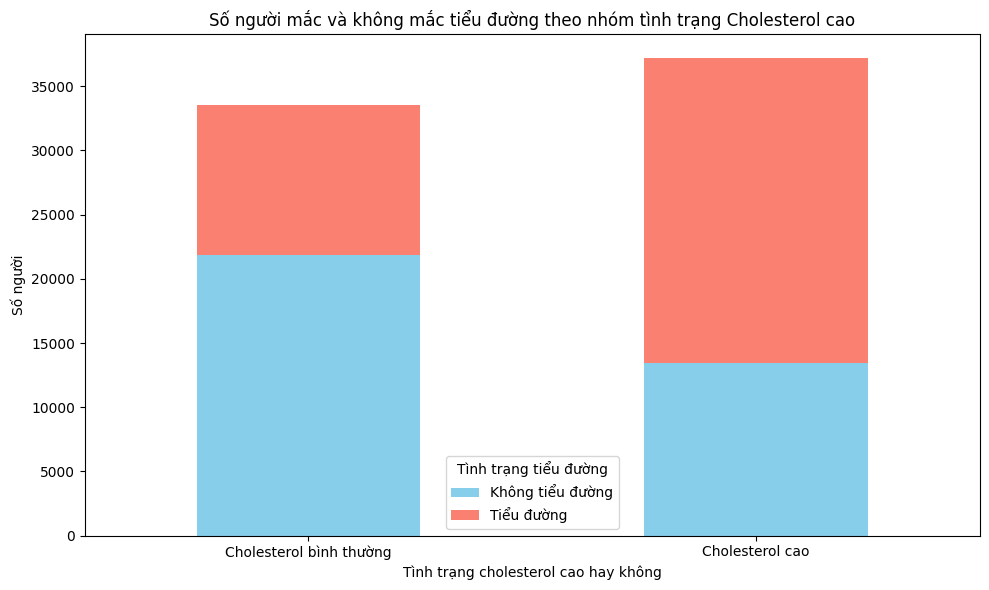

In [13]:
# phân bố tình trạng cholesterol cao và bệnh tiểu đường
grouped = df.groupby(['HighChol', 'Diabetes_binary']).size().unstack(fill_value=0)

# Đổi tên cột cho dễ hiểu (0: Không tiểu đường, 1: Tiểu đường)
grouped.columns = ['Không tiểu đường', 'Tiểu đường']


# Vẽ biểu đồ cột chồng
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title("Số người mắc và không mắc tiểu đường theo nhóm tình trạng Cholesterol cao")
plt.xlabel("Tình trạng cholesterol cao hay không")
plt.ylabel("Số người")
plt.xticks(ticks=[0, 1], labels=['Cholesterol bình thường', 'Cholesterol cao'], rotation=0)
plt.legend(title="Tình trạng tiểu đường")
plt.tight_layout()
plt.show()

`Nhận xét`: Qua phân tích trên ta thấy được nhóm người có tính trạng cholesterol trong máu cao có nguy cơ mắc bệnh tiểu đường cao hơn

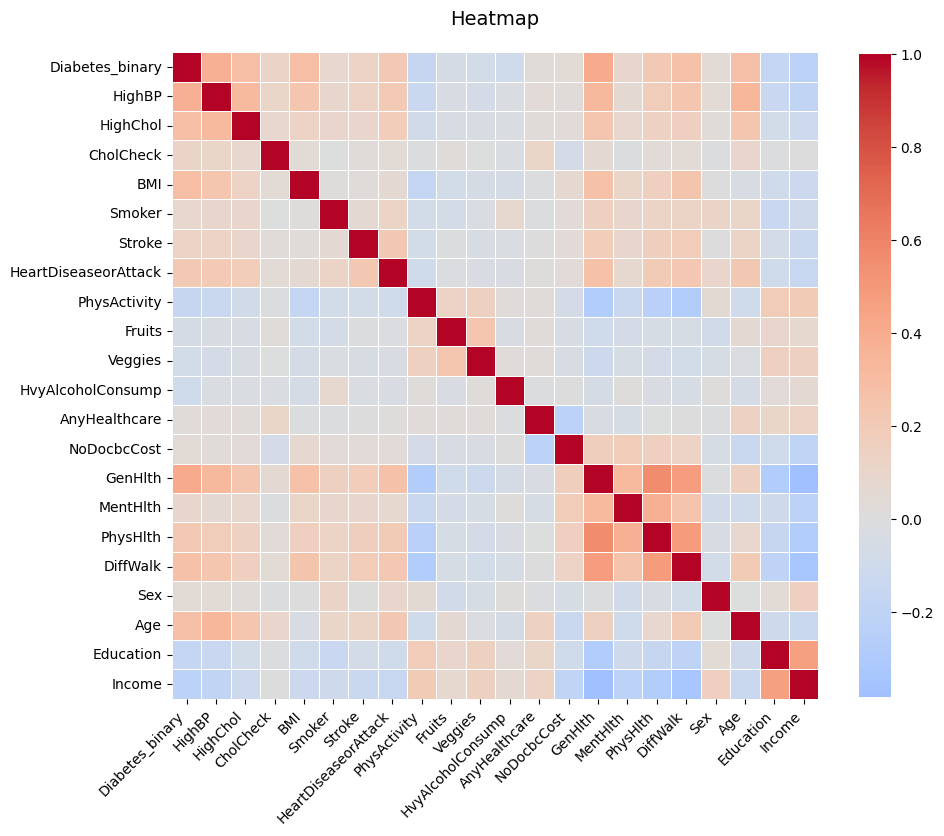

In [ ]:
# Tính ma trận tương quan
corr = df.corr()

# Lọc các biến có tương quan mạnh hoặc rất yếu
high_corr = corr[((corr.abs() > 0.2) | (corr.abs() < 0.05))].copy()
filtered_vars = high_corr.columns[~high_corr.isnull().all()]
filtered_corr = corr.loc[filtered_vars, filtered_vars]


# Vẽ heatmap vuông (x*x)
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_corr, 
            annot=False, 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.7})

plt.title('Heatmap', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Xây dựng các mô hình dự đoán bệnh nhân có nguy cơ mắc tiểu đường

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV #Công cụ mạnh mẽ để tinh chỉnh siêu tham số
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Xác định biến đầu vào (X) và biến mục tiêu (y)
X = df.drop(["Diabetes_binary", "Sex", "AnyHealthcare", "NoDocbcCost", "Education","Income"], axis=1)
y = df["Diabetes_binary"]

#Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)


### 4.1 Linear Regression

In [11]:
# Huấn luyện mô hình Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

Accuracy:, 0.7445
AUC Score:, 0.8205

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7070
         1.0       0.73      0.77      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



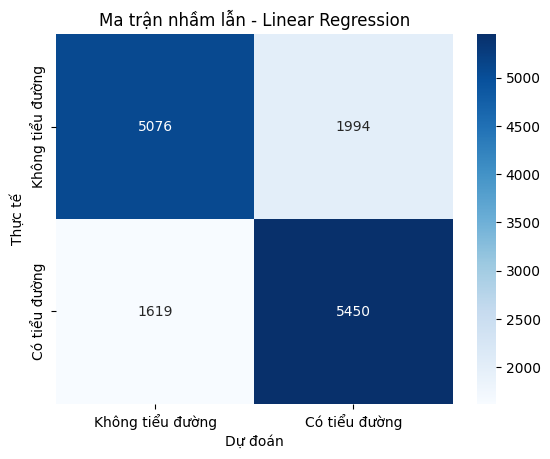

In [12]:
# Dự đoán (dạng số thực)
y_pred_prob = model_linear.predict(X_test)

# Chuyển sang dạng nhị phân bằng ngưỡng 0.5
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

# In ra độ chính xác
print(f"Accuracy:, {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC Score:, {roc_auc_score(y_test, y_pred_prob):.4f}")

# Báo cáo chi tiết
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,
            fmt='d', cmap='Blues',
            xticklabels=["Không tiểu đường", "Có tiểu đường"],
            yticklabels=["Không tiểu đường", "Có tiểu đường"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn - Linear Regression")
plt.show()

### 4.2 Random Forest

Accuracy: 0.7241671971143645

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      7070
         1.0       0.71      0.76      0.73      7069

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.72     14139
weighted avg       0.73      0.72      0.72     14139



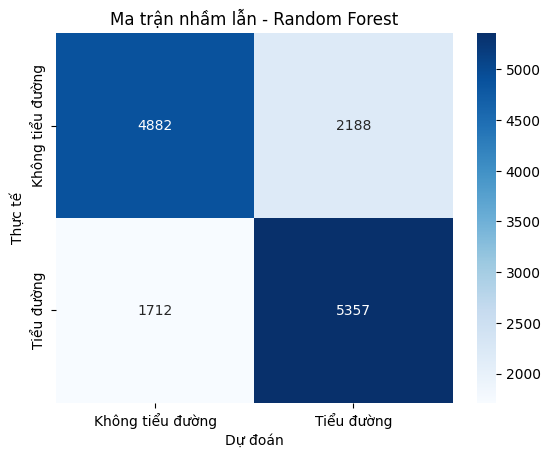

In [13]:
from sklearn.ensemble import RandomForestClassifier
# Xác định biến đầu vào (X) và biến mục tiêu (y)
X = df.drop(["Diabetes_binary", "Sex", "AnyHealthcare", "NoDocbcCost", "Education","Income"], axis=1)
y = df["Diabetes_binary"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu train/test với stratify=y để đảm bảo tỷ lệ lớp cân bằng
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Tạo và huấn luyện mô hình
rf = RandomForestClassifier(n_estimators=200, random_state=42, )
rf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = rf.predict(X_test)

# In ra độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))

# Báo cáo chi tiết
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["Không tiểu đường", "Tiểu đường"], yticklabels=["Không tiểu đường", "Tiểu đường"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn - Random Forest")
plt.show()

Bắt đầu tìm kiếm siêu tham số tốt nhất...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Tìm kiếm hoàn tất.
Điểm Accuracy tốt nhất trên tập huấn luyện (qua CV): 0.7501

--- Đánh giá mô hình Random Forest tốt nhất trên tập kiểm tra ---
Accuracy : 0.7484

Classification Report :
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



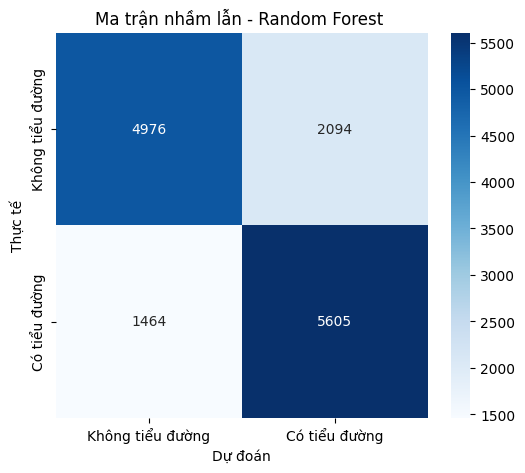


AUC Score : 0.8254


In [26]:

# Xác định biến đầu vào (X) và biến mục tiêu (y)
X = df.drop(["Diabetes_binary", "Sex", "AnyHealthcare", "NoDocbcCost", "Education","Income"], axis=1)
y = df["Diabetes_binary"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu train/test với stratify=y để đảm bảo tỷ lệ lớp cân bằng
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- Điều chỉnh siêu tham số bằng GridSearchCV ---

# Định nghĩa không gian tham số để tìm kiếm
# Lưu ý: Các giá trị này có thể cần được điều chỉnh tùy thuộc vào hiệu suất ban đầu.
# Tìm kiếm trên một không gian nhỏ hơn trước, sau đó mở rộng nếu cần.
param_grid = {
    'n_estimators': [100, 200], # Số lượng cây
    'max_features': ['sqrt'], # Cách chọn số lượng đặc trưng tại mỗi phân tách
    'max_depth': [10, 20], # Độ sâu tối đa của cây (None nghĩa là không giới hạn)
    'min_samples_split': [2, 5], # Số mẫu tối thiểu để phân tách một nút
    'min_samples_leaf': [1, 2] # Số mẫu tối thiểu ở mỗi nút lá
}

#  Tạo đối tượng GridSearchCV
# estimator: mô hình Random Forest
# param_grid: không gian tham số
# cv: số fold cho kiểm định chéo (ví dụ: 5 fold)
# scoring: tiêu chí đánh giá (ví dụ: 'accuracy' hoặc 'roc_auc')
# n_jobs: số lõi CPU sử dụng (-1 nghĩa là sử dụng tất cả các lõi)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring='accuracy', # Chúng ta muốn tối ưu hóa độ chính xác
                           n_jobs=-1, # Sử dụng tất cả các lõi CPU có sẵn
                           verbose=2) # Hiển thị tiến trình

# Thực hiện tìm kiếm
print("Bắt đầu tìm kiếm siêu tham số tốt nhất...")
grid_search.fit(X_train, y_train)
print("Tìm kiếm hoàn tất.")


print(f"Điểm Accuracy tốt nhất trên tập huấn luyện (qua CV): {grid_search.best_score_:.4f}")

# Lấy mô hình Random Forest tốt nhất
best_rf_model = grid_search.best_estimator_

# --- Đánh giá mô hình Random Forest tốt nhất trên tập kiểm tra ---

print("\n--- Đánh giá mô hình Random Forest tốt nhất trên tập kiểm tra ---")

# Dự đoán trên tập kiểm tra
y_pred_best_rf = best_rf_model.predict(X_test)

# Dự đoán xác suất cho lớp dương
y_pred_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Độ chính xác (Accuracy)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy : {accuracy_best_rf:.4f}")

# Báo cáo phân loại (Classification Report)
print("\nClassification Report :")
print(classification_report(y_test, y_pred_best_rf))

# Ma trận nhầm lẫn (Confusion Matrix)
conf_mat_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_best_rf,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=["Không tiểu đường", "Có tiểu đường"],
            yticklabels=["Không tiểu đường", "Có tiểu đường"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn - Random Forest ")
plt.show()

# AUC Score
auc_score_best_rf = roc_auc_score(y_test, y_pred_prob_best_rf)
print(f"\nAUC Score : {auc_score_best_rf:.4f}")

### 4.3 Convolution network

In [14]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling1D # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau # type: ignore

In [26]:
# Xác định biến đầu vào (X) và biến mục tiêu (y)
X = df.drop(["Diabetes_binary", "Sex", "AnyHealthcare", "NoDocbcCost", "Education", "Income"], axis=1)
y = df["Diabetes_binary"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape lại dữ liệu cho CNN (thêm chiều kênh)
X_scaled_CNN = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Tách train/test/validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled_CNN, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Age'],
      dtype='object')

In [16]:
def create_cnn_model(input_shape):
    model = Sequential([
        # Lớp tích chập 1D đầu tiên
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=1),
        Dropout(0.3),
        
        # Lớp tích chập 1D thứ hai
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=1),
        Dropout(0.4),
        
        # Lớp tích chập 1D thứ ba
        Conv1D(filters=256, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        # Chuyển đổi sang fully connected
        GlobalAveragePooling1D(),
        
        # Lớp dense
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        # Lớp đầu ra
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy', 'AUC'])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model_cnn = create_cnn_model(input_shape)

# Tóm tắt mô hình
model_cnn.summary()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 14, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 12, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,849 (620.50 KB)

 Trainable params: 157,697 (616.00 KB)

 Non-trainable params: 1,152 (4.50 KB)

In [17]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=15, mode='max', 
                              restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, 
                             min_lr=0.00001, verbose=1)

# Huấn luyện mô hình
history_cnn = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 0.5974 - accuracy: 0.5691 - loss: 0.8803 - val_AUC: 0.7438 - val_accuracy: 0.5715 - val_loss: 0.7417 - learning_rate: 1.0000e-04
Epoch 2/100
  6/354 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 0.6464 - accuracy: 0.6125 - loss: 0.8023

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 0.6786 - accuracy: 0.6296 - loss: 0.7345 - val_AUC: 0.7863 - val_accuracy: 0.6862 - val_loss: 0.6042 - learning_rate: 1.0000e-04
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 0.7155 - accuracy: 0.6592 - loss: 0.6789 - val_AUC: 0.7943 - val_accuracy: 0.7006 - val_loss: 0.5935 - learning_rate: 1.0000e-04
Epoch 4/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 0.7299 - accuracy: 0.6730 - loss: 0.6595 - val_AUC: 0.7984 - val_accuracy: 0.7159 - val_loss: 0.5750 - learning_rate: 1.0000e-04
Epoch 5/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 0.7475 - accuracy: 0.6869 - loss: 0.6303 - val_AUC: 0.8022 - val_accuracy: 0.7176 - val_loss: 0.5695 - learning_rate: 1.0000e-04
Epoch 6/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 0.7544 - accuracy: 0.6932 - loss: 0.6150 - val_AUC: 0.8054 - val_accuracy: 0.7229 - val_loss: 0.5590 - learning_rate: 1.0000e-04
Epoch 7/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - 

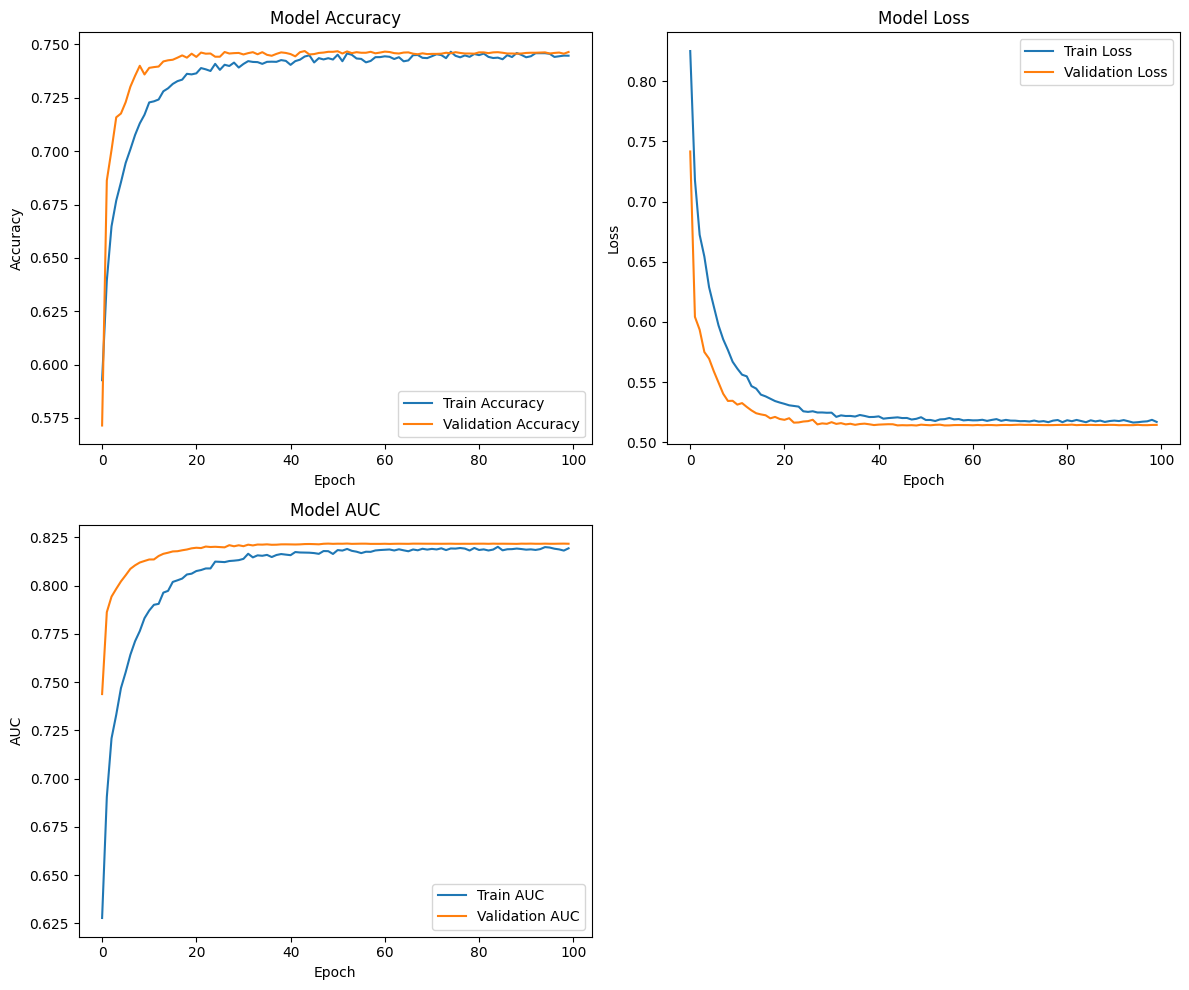

442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Đánh giá hiệu suất trên tập test:
Accuracy: 0.7477
AUC Score: 0.8264

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.72      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



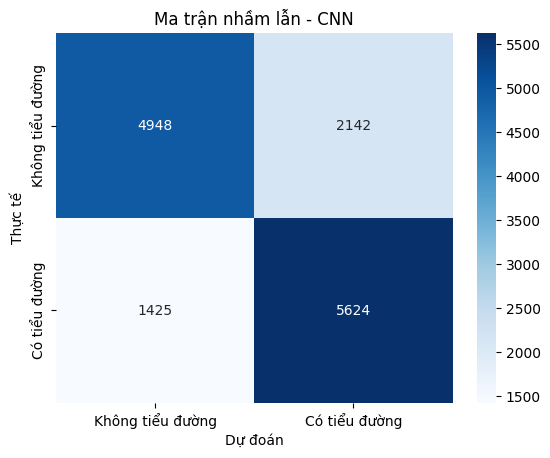

In [27]:
# Vẽ đồ thị quá trình huấn luyện
def plot_history(history):
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(history.history['AUC'], label='Train AUC')
    plt.plot(history.history['val_AUC'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history_cnn)

# Đánh giá trên tập test
y_pred_prob = model_cnn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

#Báo cáo chi tiết

print("\nĐánh giá hiệu suất trên tập test:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Ma trận nhầm lẫn
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
             cmap='Blues', xticklabels=["Không tiểu đường", "Có tiểu đường"],
             yticklabels=["Không tiểu đường", "Có tiểu đường"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn - CNN")
plt.show()

### 4.4 Multi-layer Perceptron

In [19]:
# Xác định biến đầu vào (X) và biến mục tiêu (y)
X = df.drop(["Diabetes_binary", "Sex", "AnyHealthcare", "NoDocbcCost", "Education", "Income"], axis=1)
y = df["Diabetes_binary"]

#Chuẩn hóa dữ liệu
scaler=StandardScaler()
X_scaler_MLP=scaler.fit_transform(X)


#Chia tập train/test/validation
X_train, X_test, y_train, y_test=train_test_split(X_scaler_MLP, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [20]:
#Cài đặt mô hình
def create_mlp_model(input_shape):
    model_MLP = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(1, activation='sigmoid')
    ])
    
    optimizer = Adam(learning_rate=0.0005)
    model_MLP.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy', 
                     tf.keras.metrics.AUC(name='auc')])
    return model_MLP

input_shape = X_train.shape[1]
model_MLP = create_mlp_model(input_shape)

#Tóm tắt mô hình
model_MLP.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=15, mode='max', restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)

# Huấn luyện
history_MLP = model_MLP.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6591 - auc: 0.7117 - loss: 0.6567 - val_accuracy: 0.7469 - val_auc: 0.8222 - val_loss: 0.5126 - learning_rate: 5.0000e-04
Epoch 2/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7284 - auc: 0.7949 - loss: 0.5501 - val_accuracy: 0.7503 - val_auc: 0.8257 - val_loss: 0.5085 - learning_rate: 5.0000e-04
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7364 - auc: 0.8065 - loss: 0.5343 - val_accuracy: 0.7516 - val_auc: 0.8272 - val_loss: 0.5067 - learning_rate: 5.0000e-04
Epoch 4/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7408 - auc: 0.8121 - loss: 0.5268 - val_accuracy: 0.7540 - val_auc: 0.8283 - val_loss: 0.5051 - learning_rate: 5.0000e-04
Epoch 5/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7458 - auc: 0.8139 - loss: 0.5239 - val_accuracy: 0.7540 - val_auc: 0.8290 - val_loss: 0.5041 - learning_rate: 5.0000e-04
Epoch 6/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - 

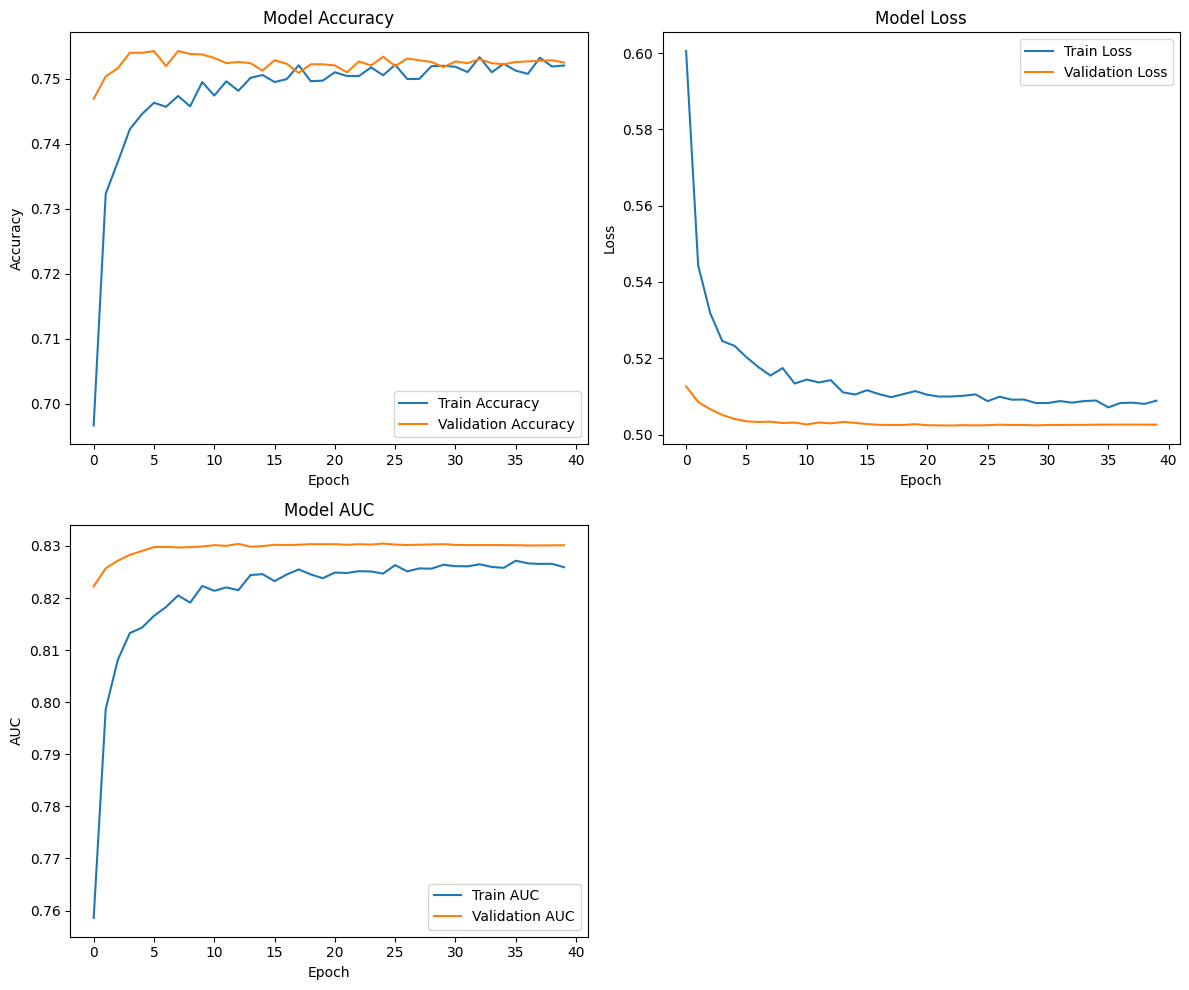

442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Đánh giá hiệu suất trên tập test:
Accuracy: 0.7494
AUC Score: 0.8281

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



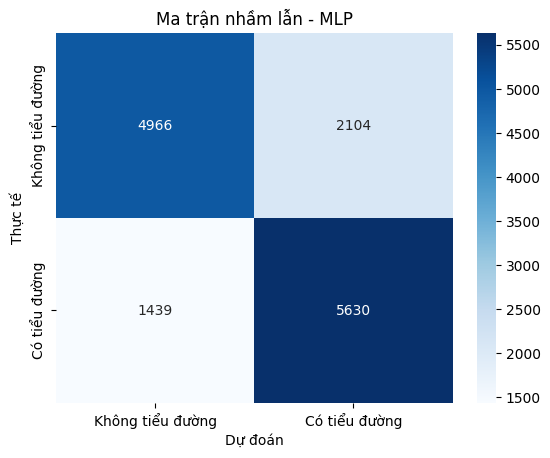

In [22]:
# Vẽ đồ thị quá trình huấn luyện
def plot_mlp_history(history):
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_mlp_history(history_MLP)

# Đánh giá trên tập test
y_pred_prob = model_MLP.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)



print("\nĐánh giá hiệu suất trên tập test:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["Không tiểu đường", "Có tiểu đường"], yticklabels=["Không tiểu đường", "Có tiểu đường"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn - MLP")
plt.show()

### Chọn Multi-layer Perceptron cho mô hình dự đoán bệnh tiểu đường

In [23]:
# save model
model_MLP.save('models/best_model.h5')

In [24]:
import pickle
with open('models/diabetes_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)